<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/%EA%B3%B5%EA%B3%B5%EC%A1%B0%EB%8B%AC(220205).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
##데이터 전처리 및 시각화 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm

In [331]:
##종합 쇼핑몰 납품 요구 내역 월별 데이터 불러오기 (2021년)
df1 = pd.read_csv("1월.csv")
df2 = pd.read_csv("2월.csv")
df3 = pd.read_csv("3월.csv")
df4 = pd.read_csv("4월.csv")
df5 = pd.read_csv("5월.csv")
df6 = pd.read_csv("6월.csv")
df7 = pd.read_csv("7월.csv")
df8 = pd.read_csv("8월.csv")
df9 = pd.read_csv("9월.csv")
df10 = pd.read_csv("10월.csv")
df11 = pd.read_csv("11월.csv")
df12 = pd.read_csv("12월.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [332]:
##종합 쇼핑몰 납품 요구 내역 2021년 데이터 저장
df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
df_all.to_csv("종합.csv")

In [333]:
##종합 쇼핑몰 2021년 데이터 불러오기
df_origin = pd.read_csv("종합.csv", parse_dates = ['납품요구접수일자'])
df_origin.set_index(df_origin['납품요구접수일자'], inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [334]:
##칼럼명 확인
df_origin.columns

Index(['Unnamed: 0', '납품요구번호', '납품요구변경차수', '수요기관명', '납품요구접수일자', '납품요구건명',
       '업체명', '대표물품분류번호', '대표품명', '대표세부물품분류번호', '대표세부품명', '증감납품요구수량',
       '증감납품요구금액', '최대납품기한', '계약구분', '계약번호', '계약변경차수', '다수공급자계약여부', '우수제품여부',
       '최종납품요구여부', '최초납품요구접수일자', '최초납품요구금액', '수요기관코드', '수요기관구분', '수요기관지역명',
       '업체사업자등록번호', '업체기업구분명', '납품요구지청명'],
      dtype='object')

In [407]:
##원본 데이터 확인
df_origin

,Unnamed: 0,납품요구번호,납품요구변경차수,수요기관명,납품요구접수일자,납품요구건명,업체명,대표물품분류번호,대표품명,대표세부물품분류번호,대표세부품명,증감납품요구수량,증감납품요구금액,최대납품기한,계약구분,계약번호,계약변경차수,다수공급자계약여부,우수제품여부,최종납품요구여부,최초납품요구접수일자,최초납품요구금액,수요기관코드,수요기관구분,수요기관지역명,업체사업자등록번호,업체기업구분명,납품요구지청명
납품요구접수일자,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-07,0,2121301332,0,울산광역시교육청 울산광역시강남교육지원청 월평유치원,2021-01-07,월평유치원 급식 기구 구입,화신주방산업 주식회사,48101521,상업용레인지,4810152101,상업용가스레인지,2.0,5230000,20210216.0,제3자단가,121921171,9,Y,N,Y,20210107,5230000,7501249,교육기관,울산광역시 남구,1268183938,중소기업,부산지방조달청
2021-01-27,1,2121306803,0,부경대학교 산학협력단,2021-01-27,지역산업맞춤형 인력양성사업 훈련장비 구입(비디오프로젝터),영상문화,45111616,비디오프로젝터,4511161601,비디오프로젝터,3.0,15120000,20210211.0,제3자단가,002160026,0,Y,N,Y,20210127,15120000,7006386,기타기관,부산광역시 남구,3052119923,중소기업,부산지방조달청
2021-01-13,2,2321303563,0,대구광역시 북구,2021-01-13,관급자재(액상제설제) 구입,주식회사 해천케미칼,47131823,제설제또는서리제거제,4713182302,액상제설제,50000.0,13200000,20210222.0,제3자단가,002061545,0,Y,N,Y,20210113,13200000,3450000,지자체,대구광역시 북구,1348169499,중소기업,대구지방조달청
2021-01-11,3,2521301786,0,충청남도 아산시,2021-01-11,외암천 재해복구공사 돌망태 조달구매,에스원스틸 주식회사,31163403,금속돌망태,3116340301,금속돌망태,907.0,4506640,20210408.0,제3자단가,251930208,1,Y,N,Y,20210111,4506640,4520000,지자체,충청남도 아산시,3088108695,중소기업,대전지방조달청
2021-01-21,4,2221309117,0,경기도 오산시,2021-01-21,제설자재(액상제설제) 구입,주식회사 해천케미칼,47131823,제설제또는서리제거제,4713182302,액상제설제,110000.0,29040000,20210302.0,제3자단가,002061545,0,Y,N,Y,20210121,29040000,4000000,지자체,경기도 오산시,1348169499,중소기업,인천지방조달청
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,195217,3921330560,0,제주특별자치도교육청 제주시교육청 백록초등학교,2021-12-31,원격 수업 환경 구축 관련 물품 구입(노트북 외 1종),주식회사 엠텍정보,43211503,노트북컴퓨터,4321150301,노트북컴퓨터,7.0,8085000,20220130.0,제3자단가,002161454,2,Y,N,Y,20211231,8085000,9295172,교육기관,제주특별자치도 제주시,4108626915,중소기업,제주지방조달청
2021-12-31,195218,3921330575,0,제주특별자치도교육청 제주시교육지원청 한천초등학교,2021-12-31,본관지하층 공기순환기 구매,은성화학주식회사,72151299,냉난방공조공사,7215129901,냉난방공조공사,620.0,20675320,20220130.0,제3자단가,001881596,19,Y,N,Y,20211231,20675320,9296046,교육기관,제주특별자치도 제주시,1248151857,중소기업,제주지방조달청
2021-12-31,195219,3921330582,0,제주특별자치도 상하수도본부,2021-12-31,조천처리분구 하수관로 정비사업(교래처리분구)전기및계측제어공사-현장제어반,주식회사 대은계전,39121189,계장제어장치,3912118901,계장제어장치,1.0,23040000,20220530.0,제3자단가,002070224,0,N,Y,Y,20211231,23040000,6500654,지자체,제주특별자치도 제주시,6168157632,중소기업,제주지방조달청


In [552]:
##원하는 칼럼만 추출
df = df_origin[['대표세부품명', '증감납품요구수량']]

In [553]:
##증감납품수량 기준 2021년 상위 10개 품목 선정, 데이터프레임 복제
df2 = df

In [554]:
##대표세부품명별 합계 확인
df2 = df2.groupby(['대표세부품명']).sum()

In [555]:
##납품요구수량 기준 내림차순 정렬
df2 = df2.sort_values('증감납품요구수량', ascending=False)

In [556]:
##랭킹 칼럼 추가, 인덱스로 지정
df2['rank'] = df2['증감납품요구수량'].rank(method='max', ascending=False)
df2 = df2.reset_index()
df2 = df2.set_index(df2['rank'])
df2 = df2.drop(['rank'], axis=1)

In [557]:
##증감납품요구수량 상위 10개 품목 확인
df2[:10]

,대표세부품명,증감납품요구수량
rank,,
1.0,쓰레기봉투,1.706780e+09
2.0,경유,5.242174e+08
3.0,라벨용지,3.416568e+08
4.0,보건용마스크,3.123527e+08
5.0,콘크리트벽돌,2.086848e+08
6.0,항공기연료,9.859411e+07
7.0,미장벽돌,5.727896e+07
8.0,기타화초,4.629742e+07
9.0,상온주스,4.626541e+07


In [558]:
##상위 10개품목 이름 저장
product = []
for i in range(10):
  product.append(df2.iat[i,0])

In [559]:
##상위 10개 품목별 데이터프레임 생성
df_1 = df[df['대표세부품명'] == product[0]]
df_2 = df[df['대표세부품명'] == product[1]]
df_3 = df[df['대표세부품명'] == product[2]]
df_4 = df[df['대표세부품명'] == product[3]]
df_5 = df[df['대표세부품명'] == product[4]]
df_6 = df[df['대표세부품명'] == product[5]]
df_7 = df[df['대표세부품명'] == product[6]]
df_8 = df[df['대표세부품명'] == product[7]]
df_9 = df[df['대표세부품명'] == product[8]]
df_10 = df[df['대표세부품명'] == product[9]]

In [560]:
##데이터 프레임 시간순서 정렬 (오래된 것 -> 최근 순)
df_1 = df_1.sort_index()
df_2 = df_2.sort_index()
df_3 = df_3.sort_index()
df_4 = df_4.sort_index()
df_5 = df_5.sort_index()
df_6 = df_6.sort_index()
df_7 = df_7.sort_index()
df_8 = df_8.sort_index()
df_9 = df_9.sort_index()
df_10 = df_10.sort_index()

In [561]:
##날짜별 시게열 대이터 그룹화 1등 품목
df_1 = df_1.drop(['대표세부품명'], axis=1)
df_1 = df_1.reset_index()
df_1 = df_1.groupby('납품요구접수일자').sum()

In [562]:
##날짜별 시게열 대이터 그룹화 2등 품목
df_2 = df_2.drop(['대표세부품명'], axis=1)
df_2 = df_2.reset_index()
df_2 = df_2.groupby('납품요구접수일자').sum()

In [563]:
##날짜별 시게열 대이터 그룹화 3등 품목
df_3 = df_3.drop(['대표세부품명'], axis=1)
df_3 = df_3.reset_index()
df_3 = df_3.groupby('납품요구접수일자').sum()

In [564]:
##날짜별 시게열 대이터 그룹화 4등 품목
df_4 = df_4.drop(['대표세부품명'], axis=1)
df_4 = df_4.reset_index()
df_4 = df_4.groupby('납품요구접수일자').sum()

In [565]:
##날짜별 시게열 대이터 그룹화 5등 품목
df_5 = df_5.drop(['대표세부품명'], axis=1)
df_5 = df_6.reset_index()
df_5 = df_5.groupby('납품요구접수일자').sum()

In [566]:
##날짜별 시게열 대이터 그룹화 6등 품목
df_6 = df_6.drop(['대표세부품명'], axis=1)
df_6 = df_6.reset_index()
df_6 = df_6.groupby('납품요구접수일자').sum()

In [567]:
##날짜별 시게열 대이터 그룹화 7등 품목
df_7 = df_7.drop(['대표세부품명'], axis=1)
df_7 = df_7.reset_index()
df_7 = df_7.groupby('납품요구접수일자').sum()

In [568]:
##날짜별 시게열 대이터 그룹화 8등 품목
df_8 = df_8.drop(['대표세부품명'], axis=1)
df_8 = df_8.reset_index()
df_8 = df_8.groupby('납품요구접수일자').sum()

In [569]:
##날짜별 시게열 대이터 그룹화 9등 품목
df_9 = df_9.drop(['대표세부품명'], axis=1)
df_9 = df_9.reset_index()
df_9 = df_9.groupby('납품요구접수일자').sum()

In [570]:
##날짜별 시게열 대이터 그룹화 10등 품목
df_10 = df_10.drop(['대표세부품명'], axis=1)
df_10 = df_10.reset_index()
df_10 = df_10.groupby('납품요구접수일자').sum()

In [572]:
product

['쓰레기봉투',
 '경유',
 '라벨용지',
 '보건용마스크',
 '콘크리트벽돌',
 '항공기연료',
 '미장벽돌',
 '기타화초',
 '상온주스',
 '레미콘']

In [573]:
##전처리 완료 데이터 내보내기
df_1.to_csv("1등_쓰레기봉투.csv")
df_2.to_csv("2등_경유.csv")
df_3.to_csv("3등_라벨용지.csv")
df_4.to_csv("4등_보건용마스크.csv")
df_5.to_csv("5등_콘크리트벽돌.csv")
df_6.to_csv("6등_항공기연료.csv")
df_7.to_csv("7등_미장벽돌.csv")
df_8.to_csv("8등_기타화초.csv")
df_9.to_csv("9등_상온주스.csv")
df_10.to_csv("10등_레미콘.csv")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_

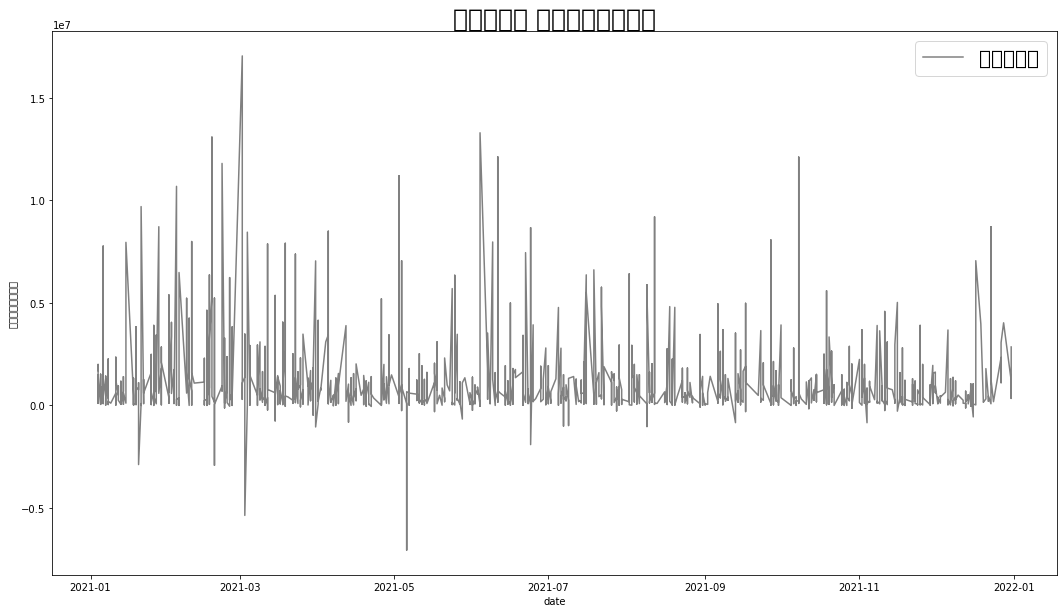

In [269]:
##데이터 시각화
df__1 = df_1.reset_index()
plt.rcParams["font.family"] = 'NanumMyeongjo'
plt.figure(figsize = (18,10))
plt.title("{} 증감납품요구수량".format(product[0]), fontsize=25)
plt.plot(df__1['납품요구접수일자'], df__1['증감납품요구수량'], color='grey', label=str(product[0]))
plt.ylabel('증감납품요구수량')
plt.xlabel('date')
plt.legend(fontsize=20)
plt.show()